## Programming for Data Analysis Project 2021

### Table of Contents

1. Introduction


### This Document

##### Problem Statement.

For this project you must create a data set by simulating a real-world phenomenon of your choosing. You may pick any phenomenon you wish – you might pick one that is of interest to you in your personal or professional life. Then, rather than collect data related to the phenomenon, you should model and synthesise such data using Python. We suggest you use the numpy.random package for this purpose. Specifically, in this project you should:

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.
* Investigate the types of variables involved, their likely distributions, and their relationships with each other.
* Synthesise/simulate a data set as closely matching their properties as possible.
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.

#### Topic

A look into the Returns of Service of the RNLI Galay Station 2008 - 2020

##### Plan of Work

* Import and process data
* Assess incidents per year - replicate and project future numbers
* Time and Day of incidents
* Location of incidents
* Weather and incidents

### Python Libraries

In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
filename = "RNLI_Returns_of_Service_Galway.csv"

df = pd.read_csv(filename)

In [3]:
print(df.columns)

Index(['X', 'Y', 'OBJECTID', 'AIC', 'LifeboatStationNameProper', 'LaunchTime',
       'YearOfCall', 'LifeboatClass', 'LifeboatNumber', 'RoSType',
       'CasualtyCategory', 'CasualtyTypeFull', 'ReasonForLaunch',
       'OutcomeOfService', 'Activity', 'VisibilityAtIncident',
       'WeatherAtIncident', 'SeaConditionsAtIncident', 'WeatherAtLaunch',
       'VisibilityAtLaunch', 'WindDirectionAtLaunch', 'SeaConditionsAtLaunch',
       'DateOfLaunch'],
      dtype='object')


In [4]:
shape = df.shape

print("Shape")
print(shape)

Shape
(411, 23)


In [5]:
count = df.count()

print("Count")
print(count)

Count
X                            411
Y                            411
OBJECTID                     411
AIC                          411
LifeboatStationNameProper    411
LaunchTime                   411
YearOfCall                   411
LifeboatClass                411
LifeboatNumber               411
RoSType                      411
CasualtyCategory             411
CasualtyTypeFull             411
ReasonForLaunch              411
OutcomeOfService             411
Activity                     411
VisibilityAtIncident         411
WeatherAtIncident            411
SeaConditionsAtIncident      411
WeatherAtLaunch              411
VisibilityAtLaunch           411
WindDirectionAtLaunch        411
SeaConditionsAtLaunch        411
DateOfLaunch                 411
dtype: int64


In [6]:
summary = df.describe()

print(summary)

                X           Y       OBJECTID   YearOfCall  \
count  411.000000  411.000000     411.000000   411.000000   
mean    -9.072649   53.245187   59296.693431  2014.627737   
std      0.087915    0.031546   36193.517428     3.783805   
min     -9.783900   53.124400     368.000000  2008.000000   
25%     -9.089445   53.241700   27881.000000  2011.000000   
50%     -9.050000   53.254890   64428.000000  2015.000000   
75%     -9.025000   53.266100   98655.000000  2018.000000   
max     -8.936870   53.291700  112496.000000  2020.000000   

       WindDirectionAtLaunch  
count             411.000000  
mean              191.316302  
std                91.053333  
min                 0.000000  
25%               135.000000  
50%               225.000000  
75%               270.000000  
max               338.000000  


In [7]:
countYears = df["YearOfCall"].value_counts()
print(countYears)

2019    66
2016    48
2020    34
2014    33
2013    31
2011    28
2008    27
2017    26
2009    26
2012    25
2010    24
2015    23
2018    20
Name: YearOfCall, dtype: int64


In [8]:
df.groupby("VisibilityAtIncident").head(1)

,X,Y,OBJECTID,AIC,LifeboatStationNameProper,LaunchTime,YearOfCall,LifeboatClass,LifeboatNumber,RoSType,...,OutcomeOfService,Activity,VisibilityAtIncident,WeatherAtIncident,SeaConditionsAtIncident,WeatherAtLaunch,VisibilityAtLaunch,WindDirectionAtLaunch,SeaConditionsAtLaunch,DateOfLaunch
0,-9.04170,53.26670,368,Waterside activity - On shore,GALWAY,02:47:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,FAIR,CLOUDY,SLIGHT,CLOUDY,FAIR,180,SLIGHT,2016/01/31 00:00:00+00
1,-8.97000,53.27000,369,Hoax and false alarm,GALWAY,14:22:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,CHOPPY,CLOUDY,GOOD,203,CHOPPY,2016/01/03 00:00:00+00
30,-9.08330,53.25330,2983,Motorboating - Other reason,GALWAY,13:53:00,2016,ATLANTIC 85,B-853,ILB,...,Rendered assistance,NOT KNOWN / NOT RELEVANT / OTHER,EXCELLENT,CLEAR SKY,CALM,CLEAR SKY,EXCELLENT,135,CALM,2016/05/15 00:00:00+00
53,-9.04670,53.25830,9946,Person in distress,GALWAY,03:20:00,2012,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,POOR,OVERCAST,CALM,OVERCAST,POOR,315,CALM,2012/01/08 00:00:00+00
381,-9.04514,53.26768,105330,Other,GALWAY,08:50:00,2020,ATLANTIC 85,B-853,ILB,...,Stood Down,Unknown,UNKNOWN,UNKNOWN,UNKNOWN,CLEAR SKIES,FAIR,270,SMOOTH,2020/01/09 08:58:59+00


In [9]:
df.groupby("WeatherAtIncident").head(1)

,X,Y,OBJECTID,AIC,LifeboatStationNameProper,LaunchTime,YearOfCall,LifeboatClass,LifeboatNumber,RoSType,...,OutcomeOfService,Activity,VisibilityAtIncident,WeatherAtIncident,SeaConditionsAtIncident,WeatherAtLaunch,VisibilityAtLaunch,WindDirectionAtLaunch,SeaConditionsAtLaunch,DateOfLaunch
0,-9.04170,53.26670,368,Waterside activity - On shore,GALWAY,02:47:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,FAIR,CLOUDY,SLIGHT,CLOUDY,FAIR,180,SLIGHT,2016/01/31 00:00:00+00
3,-9.06330,53.25830,487,Waterside activity - On shore,GALWAY,02:40:00,2016,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,CALM,CLEAR SKY,GOOD,0,CALM,2016/02/15 00:00:00+00
4,-9.00000,53.25830,657,Waterside activity - On shore,GALWAY,12:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,PART CLOUDY,SMOOTH,PART CLOUDY,GOOD,225,SMOOTH,2016/01/02 00:00:00+00
43,-9.13500,53.15330,6453,Sailing - Other reason,GALWAY,14:19:00,2016,ATLANTIC 85,B-853,ILB,...,Rendered assistance,SAILING,GOOD,OVERCAST,SLIGHT,OVERCAST,GOOD,315,SLIGHT,2016/07/30 00:00:00+00
80,-9.04550,53.26410,18829,Person in distress,GALWAY,19:50:00,2011,ATLANTIC 75,B-757,ILB,...,Others assisted casualty,SUSPECTED SELF HARM,POOR,SQUALLY,SLIGHT,SQUALLY,POOR,270,SLIGHT,2011/04/01 00:00:00+00
115,-8.98330,53.24250,31714,Small craft - Dinghy sailing,GALWAY,17:00:00,2014,ATLANTIC 85,B-853,ILB,...,Resolved unaided,SAILING,FAIR,MIST,SLIGHT,MIST,FAIR,180,SLIGHT,2014/06/01 00:00:00+00
172,-9.14000,53.12440,49392,Motorboating - Other reason,GALWAY,21:20:00,2008,ATLANTIC 75,B-738,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,POOR,RAIN,ROUGH,RAIN,POOR,225,ROUGH,2008/08/02 00:00:00+00
259,-9.04370,53.26620,76235,Waterside activity - On shore,GALWAY,21:16:00,2010,ATLANTIC 75,B-757,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,POOR,FOG,CALM,FOG,POOR,0,CALM,2010/12/07 00:00:00+00
267,-9.22833,53.24000,78530,Unknown,GALWAY,15:53:00,2019,ATLANTIC 85,B-853,ILB,...,Rendered assistance,Unknown,GOOD,CLEAR SKIES,CALM,CLEAR SKIES,GOOD,0,CALM,2019/01/20 16:09:59+00
289,-9.03812,53.26782,88481,Other - other,GALWAY,13:33:00,2019,ATLANTIC 85,B-853,ILB,...,Rendered assistance,Unknown,POOR,RAIN / HAIL,SLIGHT,RAIN / HAIL,POOR,180,SLIGHT,2019/03/11 14:39:00+00


In [10]:
df.groupby("SeaConditionsAtIncident").head(1)

,X,Y,OBJECTID,AIC,LifeboatStationNameProper,LaunchTime,YearOfCall,LifeboatClass,LifeboatNumber,RoSType,...,OutcomeOfService,Activity,VisibilityAtIncident,WeatherAtIncident,SeaConditionsAtIncident,WeatherAtLaunch,VisibilityAtLaunch,WindDirectionAtLaunch,SeaConditionsAtLaunch,DateOfLaunch
0,-9.04170,53.26670,368,Waterside activity - On shore,GALWAY,02:47:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,FAIR,CLOUDY,SLIGHT,CLOUDY,FAIR,180,SLIGHT,2016/01/31 00:00:00+00
1,-8.97000,53.27000,369,Hoax and false alarm,GALWAY,14:22:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,CHOPPY,CLOUDY,GOOD,203,CHOPPY,2016/01/03 00:00:00+00
3,-9.06330,53.25830,487,Waterside activity - On shore,GALWAY,02:40:00,2016,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,CALM,CLEAR SKY,GOOD,0,CALM,2016/02/15 00:00:00+00
4,-9.00000,53.25830,657,Waterside activity - On shore,GALWAY,12:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,PART CLOUDY,SMOOTH,PART CLOUDY,GOOD,225,SMOOTH,2016/01/02 00:00:00+00
11,-9.00000,53.24170,1143,Person in distress,GALWAY,14:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,SUSPECTED SELF HARM,GOOD,PART CLOUDY,ROUGH,PART CLOUDY,GOOD,225,ROUGH,2016/03/25 00:00:00+00
236,-9.07960,53.25240,70150,Hoax and false alarm,GALWAY,23:00:00,2010,ATLANTIC 75,B-757,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,GLASS CALM,CLEAR SKY,GOOD,90,GLASS CALM,2010/10/11 00:00:00+00
255,-9.04670,53.26830,75352,Waterside activity - In water,GALWAY,22:24:00,2013,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,POOR,SQUALLY,VERY ROUGH,SQUALLY,POOR,180,VERY ROUGH,2013/12/26 00:00:00+00
276,-9.05475,53.26976,81104,Person in distress,GALWAY,20:26:00,2017,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,Person in distress,GOOD,PART CLOUDY,MOD/CHOP,PART CLOUDY,GOOD,45,MOD/CHOP,2017/01/08 20:35:59+00
381,-9.04514,53.26768,105330,Other,GALWAY,08:50:00,2020,ATLANTIC 85,B-853,ILB,...,Stood Down,Unknown,UNKNOWN,UNKNOWN,UNKNOWN,CLEAR SKIES,FAIR,270,SMOOTH,2020/01/09 08:58:59+00


In [11]:
df.groupby("WindDirectionAtLaunch").head(1)

,X,Y,OBJECTID,AIC,LifeboatStationNameProper,LaunchTime,YearOfCall,LifeboatClass,LifeboatNumber,RoSType,...,OutcomeOfService,Activity,VisibilityAtIncident,WeatherAtIncident,SeaConditionsAtIncident,WeatherAtLaunch,VisibilityAtLaunch,WindDirectionAtLaunch,SeaConditionsAtLaunch,DateOfLaunch
0,-9.0417,53.2667,368,Waterside activity - On shore,GALWAY,02:47:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,FAIR,CLOUDY,SLIGHT,CLOUDY,FAIR,180,SLIGHT,2016/01/31 00:00:00+00
1,-8.9700,53.2700,369,Hoax and false alarm,GALWAY,14:22:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,CHOPPY,CLOUDY,GOOD,203,CHOPPY,2016/01/03 00:00:00+00
2,-8.9917,53.2383,370,Person in water,GALWAY,12:38:00,2016,ATLANTIC 85,B-853,ILB,...,Rendered assistance,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,CHOPPY,CLOUDY,GOOD,338,CHOPPY,2016/01/07 00:00:00+00
3,-9.0633,53.2583,487,Waterside activity - On shore,GALWAY,02:40:00,2016,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,CALM,CLEAR SKY,GOOD,0,CALM,2016/02/15 00:00:00+00
4,-9.0000,53.2583,657,Waterside activity - On shore,GALWAY,12:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,PART CLOUDY,SMOOTH,PART CLOUDY,GOOD,225,SMOOTH,2016/01/02 00:00:00+00
9,-9.0000,53.2417,1140,Hoax and false alarm,GALWAY,13:10:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,PART CLOUDY,CALM,PART CLOUDY,GOOD,90,CALM,2016/04/04 00:00:00+00
10,-9.1417,53.2433,1142,Hoax and false alarm,GALWAY,18:59:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,SLIGHT,CLOUDY,GOOD,270,SLIGHT,2016/03/30 00:00:00+00
18,-9.0000,53.2583,1295,Person in distress,GALWAY,18:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,SUSPECTED SELF HARM,FAIR,CLOUDY,CHOPPY,CLOUDY,FAIR,315,CHOPPY,2016/04/06 00:00:00+00
20,-9.0417,53.2667,1298,Person in distress,GALWAY,16:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,SUSPECTED SELF HARM,GOOD,CLOUDY,SLIGHT,CLOUDY,GOOD,135,SLIGHT,2016/04/02 00:00:00+00
26,-9.0547,53.2700,2939,Person in distress,GALWAY,16:07:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,SUSPECTED SELF HARM,GOOD,PART CLOUDY,SMOOTH,PART CLOUDY,GOOD,45,SMOOTH,2016/04/28 00:00:00+00


In [12]:
df.groupby("SeaConditionsAtLaunch").head(1)

,X,Y,OBJECTID,AIC,LifeboatStationNameProper,LaunchTime,YearOfCall,LifeboatClass,LifeboatNumber,RoSType,...,OutcomeOfService,Activity,VisibilityAtIncident,WeatherAtIncident,SeaConditionsAtIncident,WeatherAtLaunch,VisibilityAtLaunch,WindDirectionAtLaunch,SeaConditionsAtLaunch,DateOfLaunch
0,-9.04170,53.26670,368,Waterside activity - On shore,GALWAY,02:47:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,FAIR,CLOUDY,SLIGHT,CLOUDY,FAIR,180,SLIGHT,2016/01/31 00:00:00+00
1,-8.97000,53.27000,369,Hoax and false alarm,GALWAY,14:22:00,2016,ATLANTIC 85,B-853,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLOUDY,CHOPPY,CLOUDY,GOOD,203,CHOPPY,2016/01/03 00:00:00+00
3,-9.06330,53.25830,487,Waterside activity - On shore,GALWAY,02:40:00,2016,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,CALM,CLEAR SKY,GOOD,0,CALM,2016/02/15 00:00:00+00
4,-9.00000,53.25830,657,Waterside activity - On shore,GALWAY,12:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,PART CLOUDY,SMOOTH,PART CLOUDY,GOOD,225,SMOOTH,2016/01/02 00:00:00+00
11,-9.00000,53.24170,1143,Person in distress,GALWAY,14:00:00,2016,ATLANTIC 85,B-853,ILB,...,Unsuccessful search,SUSPECTED SELF HARM,GOOD,PART CLOUDY,ROUGH,PART CLOUDY,GOOD,225,ROUGH,2016/03/25 00:00:00+00
236,-9.07960,53.25240,70150,Hoax and false alarm,GALWAY,23:00:00,2010,ATLANTIC 75,B-757,ILB,...,False alarm,NOT KNOWN / NOT RELEVANT / OTHER,GOOD,CLEAR SKY,GLASS CALM,CLEAR SKY,GOOD,90,GLASS CALM,2010/10/11 00:00:00+00
255,-9.04670,53.26830,75352,Waterside activity - In water,GALWAY,22:24:00,2013,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,NOT KNOWN / NOT RELEVANT / OTHER,POOR,SQUALLY,VERY ROUGH,SQUALLY,POOR,180,VERY ROUGH,2013/12/26 00:00:00+00
276,-9.05475,53.26976,81104,Person in distress,GALWAY,20:26:00,2017,ATLANTIC 85,B-853,ILB,...,Others assisted casualty,Person in distress,GOOD,PART CLOUDY,MOD/CHOP,PART CLOUDY,GOOD,45,MOD/CHOP,2017/01/08 20:35:59+00


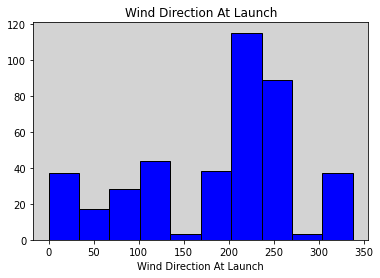

In [13]:
    ax = plt.axes()
    plt.hist(df["WindDirectionAtLaunch"], color = "b", ec = "black")
    plt.title("Wind Direction At Launch")
    plt.xlabel("Wind Direction At Launch")
    ax.set_facecolor("lightgrey")

In [14]:
df["SeaConditionsAtLaunch"].value_counts()

CALM          137
SMOOTH         90
SLIGHT         86
CHOPPY         46
ROUGH          26
MOD/CHOP       24
GLASS CALM      1
VERY ROUGH      1
Name: SeaConditionsAtLaunch, dtype: int64

<AxesSubplot:>

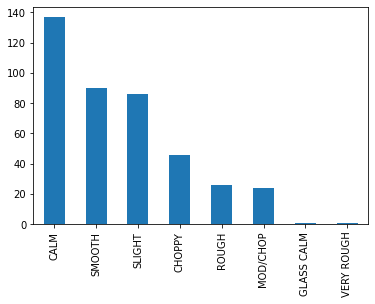

In [15]:
df["SeaConditionsAtLaunch"].value_counts().plot(kind = 'bar')

<AxesSubplot:xlabel='WindDirectionAtLaunch', ylabel='Count'>

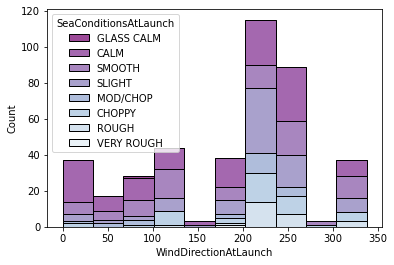

In [16]:
import seaborn as sns

hue_order = ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']
sns.histplot( x="WindDirectionAtLaunch", hue="SeaConditionsAtLaunch", data = df, palette="BuPu_r", hue_order = hue_order, multiple = "stack")


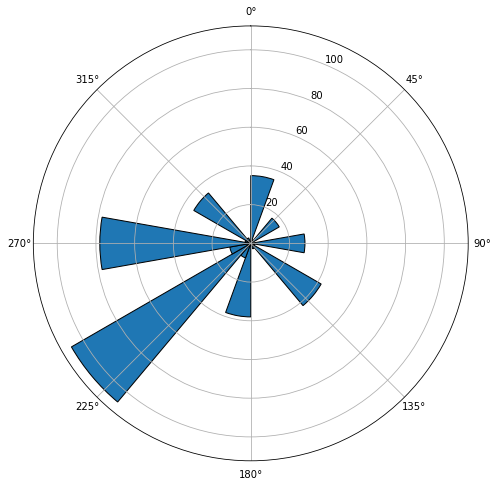

In [17]:
import numpy as np
import matplotlib.pyplot as plt

degrees = df["WindDirectionAtLaunch"]
radians = np.deg2rad(degrees)


bin_size = 20
a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection='polar')
ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, edgecolor='k')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
plt.show()

In [32]:
import plotly.express as px

fig = px.bar_polar(df, r="SeaConditionsAtLaunch", theta="WindDirectionAtLaunch",
                   color="SeaConditionsAtLaunch", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r, 
                   category_orders = {"SeaConditionsAtLaunch": 
                                      ['GLASS CALM', 'CALM', 'SMOOTH','SLIGHT', 'MOD/CHOP', 'CHOPPY','ROUGH', 'VERY ROUGH']})
fig.show()

In [ ]:
{